In [25]:
import pandas as pd
import json 
import urllib.parse
import time
import requests
import json
import urllib.request

df = pd.read_csv("graph.csv",encoding='cp1252')

d = {'node':[],'hop':[]}
nodeset = set()
nodelist = []

for index,row in df.iterrows():
    x = json.loads(row["edges_within_category"])
    for i in x["key"]:
        d["node"].append(row["node"])
        d["hop"].append(i)
        nodeset.add(i)

    x = json.loads(row["edges_outside_category"])
    for i in x["key"]:
        d["node"].append(row["node"])
        d["hop"].append(i)
        nodeset.add(i)

    nodelist.append(row["node"])
    nodeset.add(row["node"])

df = pd.DataFrame(data=d)

In [28]:
print(len(nodeset))

{'Shreyas Talpade', 'Haseena Maan Jaayegi', 'Nirupedalu', 'Tarka (film)', '4th Mirchi Music Awards', 'Jinu Joseph', 'Sher Singh', 'CID Unnikrishnan B.A., B.Ed.', 'Bhagyadevatha', 'Shivaji Guruvayoor', 'Taneem Rahman Angshu', 'Darwaaza Bandh Rakho', 'Minnaminnikoottam', 'Filmfare Special Award', 'Bhalo Theko', 'S. V. Krishna Reddy', 'Sweety Nanna Jodi', 'Pavunnu Pavunuthan', 'Yehudi Menuhin', 'Celina Jaitly', 'Ravishankar Raval', 'Sarvottam Badami', 'Anuvab Mohanty', 'Alaya Deepam', 'Bharat Bhushan (yogi)', '66th National Film Awards', 'Love triangle', 'Sabrina: The Animated Series', 'Bahar (film)', 'Kittie Party', 'Guest House (1980 film)', 'Ananth Nag', 'Kancheepurathe Kalyanam', 'Captain Raju', 'Maya (2012 TV series)', 'Achhut Kannya', 'Koodappirappu', 'Theevram', 'Vijayaraghavan', 'President Gari Abbai', 'Hyperlink cinema', 'Vinod Nagpal', 'Ahmedabad–Dholera Expressway', 'Naina (2002 film)', 'S. P. Kothari', 'Elangbam Nilakanta Singh', 'Kahani Chandrakanta Ki', 'Khayal Gatha', 'Rail

In [29]:
views_dict = {}

url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{}/monthly/20150101/20231212"
counter = 0
for node in nodeset:

    if counter >= 198:
        counter = 0
        time.sleep(1)

    uri_parsed_string = urllib.parse.quote(node)
    crafted_url = url.format(str(uri_parsed_string))

    try:
        counter += 1
        page = urllib.request.urlopen(crafted_url).read()
        page = page.decode("UTF-8")
        items = json.loads(page)
        total = 0
        for item in items["items"]:
            total += item["views"]
    except:
        total = None

    views_dict[node] = total

with open('pageviews.json', 'w') as fp:
    json.dump(views_dict, fp)

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

In [17]:
g = nx.from_pandas_edgelist(df, source='node', target='hop')
# print(g)
# from matplotlib.pyplot import figure
# figure(figsize=(100, 100))
# nx.draw_shell(g, with_labels=True)
g.degree("Agni (1989 film)")

120

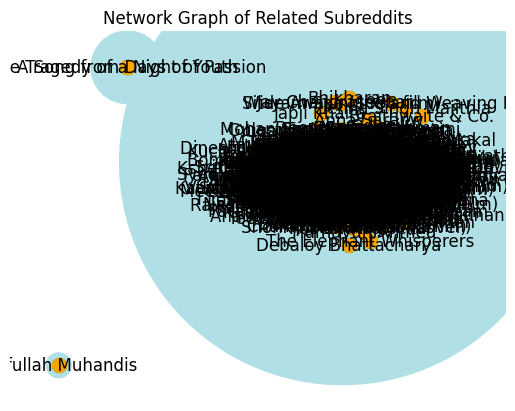

In [18]:
# Create the graph from the dataframe [5]
g = nx.from_pandas_edgelist(df, source='node', target='hop')
# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

sub_size = [g.degree(sub) * 80 for sub in nodelist] #multiplying by 80 to get circular size
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=nodelist, 
                       node_size=sub_size, 
                       node_color='powderblue')
# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=nodelist, node_color='green', node_size=100)
# Draw highly connected influencers 
popular_people = [person for person in nodelist if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)
nx.draw_networkx_edges(g, layout, width=1, edge_color="lightgreen")
node_labels = dict(zip(nodelist, nodelist)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.show()